<h1><center>Performance Assessment:Data Cleaning (NUM3)</center></h1>
<h3><center> by Bader Ale <center><h3>

For this Performance Assessment, I will be using the medical data contained in the D206 Definitions and Datafile directory.

# Part 1: Research Question and Variables
The research question for this analysis is:
**Is there a relation between the amount of times the primary physician visited the patient during their hospital stay and the occurence of readmission within 30 days following the patient's discharge from the facility?**

The first thing we have to do is import the original CSV file that contains our data. To do this, we must first import the necessary packages.

In [141]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell

InteractiveShell.ast_node_interactivity = "all"

In [142]:
# Reading in the original CSV file
df = pd.read_csv(r'C:\Users\Bader Ale\Documents\WGU_MSDA\D206_Data Cleaning\Performance Assessment\medical_raw_data.csv')

After importing our CSV file, we will see the first 5 records of our dataframe and see the overall shape/size.

In [143]:
# Returning first 5 records of dataframe
df.head(5)

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [144]:
# Returning number of (rows, columns)
df.shape

(10000, 53)

Our dataframe has a total of 10,000 rows and 53 columns. Next, we will return a list of all variables and their dataypes.

In [145]:
# Return variables, datatypes and non-null status of each.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

# Part 2: Detection and Treatment of Duplicates
Our first task is to detect and treat any duplicated values in our entire dataset.

In [146]:
# Returning a total count of duplicated values
df.duplicated().value_counts()

False    10000
dtype: int64

Here we can see there are **no** duplicated values, represented by the "False 10000" output (which is also the total rows shown in the .shape fucntion). We can now move to the next section of data cleaning, detection and treatment of missing values.

# Part 3: Detection and Treatment of Missing Values
In this section, we will see if there are any missing values for all variables in the dataset.

In [147]:
# Returning a list of variables with total counts for missing values 
df.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

Here we can see that there are 7 columns with missing values; **children**, **age**, **income**, **soft_drink**, **overweight**, **anxiety** and **initial_days**
<br>
<br>1) **Children** and **Age** are considered *discrete quantitative variables* because they can only be particular numbers
<br>2) **Income** and **Initial_days** are considered *continuous quantitative variables* because your income can be whole numbers or contain decimals
<br>3) **Overweight**, **Soft_drink** and **Anxiety** are considered *nominal qualitative variables* because they are either yes or no

We will return some basic statistics on the quantitative variables to check the before and after imputation.

In [148]:
# Checking statistical information on the columns with missing data that are quantative
df[['Children', 'Age', 'Income','Initial_days']].describe()

,Children,Age,Income,Initial_days
count,7412.000000,7586.000000,7536.000000,8944.000000
mean,2.098219,53.295676,40484.438268,34.432082
std,2.155427,20.659182,28664.861050,26.287050
min,0.000000,18.000000,154.080000,1.001981
25%,0.000000,35.000000,19450.792500,7.911709
50%,1.000000,53.000000,33942.280000,34.446941
75%,3.000000,71.000000,54075.235000,61.124654
max,10.000000,89.000000,207249.130000,71.981486


Using the seaborn package, we can create histograms of the quantitative variables **Children**, **Age**, **Income**, **Intial_days** to visually
analyze their distribution, but before we must import the seaborn package into our notebook.

In [149]:
# Importing seaborn package with the inline magic function
import seaborn as sns

%matplotlib inline 

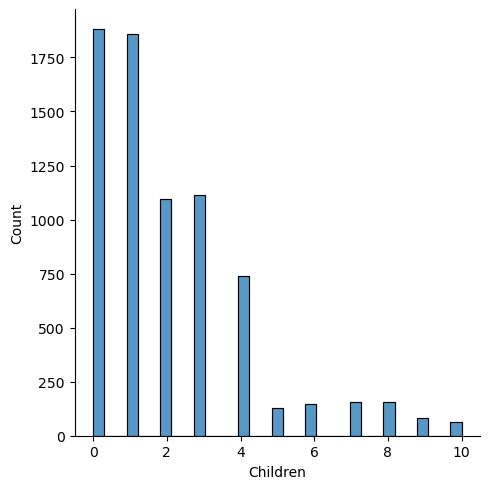

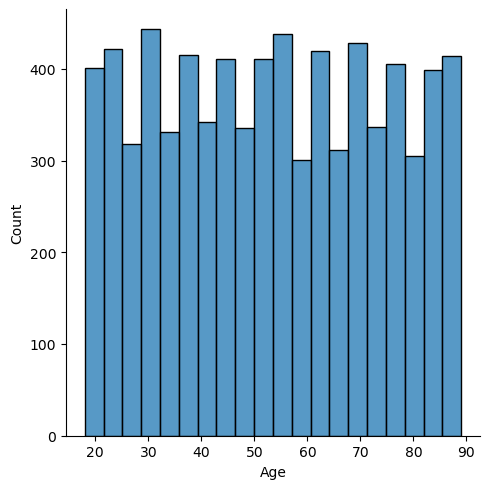

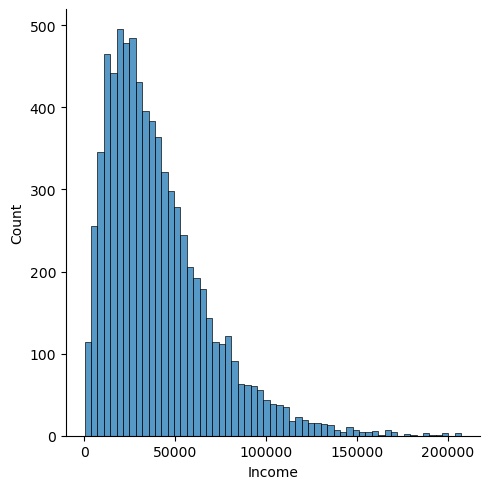

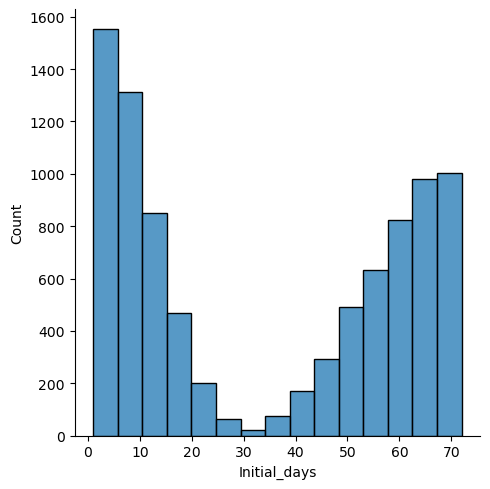

In [150]:
#Plotting histograms
sns.displot(df, x='Children')
sns.displot(df, x='Age')
sns.displot(df, x='Income')
sns.displot(df, x='Initial_days')

From these graphs, we can see that:

1) Both **Children** and **Income** are positively skewed to the right
2) **Age** is uniformly distributed 
3) **Initial_days** has a bimodal distribution

For **Income**, **Children** and **Initial_days** variables, we will treat missing values by imputation using the median value while for **Age** we will be using the mean for imputation.

In [151]:
# Performing imputation 
df['Children'].fillna(df['Children'].median(), inplace= True) # Using median value for Children
df['Income'].fillna(df['Income'].median(), inplace= True) # Using Median value for Income
df['Initial_days'].fillna(df['Initial_days'].median(), inplace= True) # Using median value for Initial_days
df['Age'].fillna(df['Age'].mean(), inplace= True) # Performing imputation using mean values form Age

In [152]:
# Checking statistics again for comparison
df[['Children', 'Age', 'Income','Initial_days']].describe()

,Children,Age,Income,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.814000,53.295676,38872.450471,34.433651
std,1.916969,17.993375,25042.796229,24.860232
min,0.000000,18.000000,154.080000,1.001981
25%,1.000000,41.000000,23956.162500,8.928987
50%,1.000000,53.295676,33942.280000,34.446941
75%,3.000000,65.000000,46466.797500,59.459981
max,10.000000,89.000000,207249.130000,71.981486


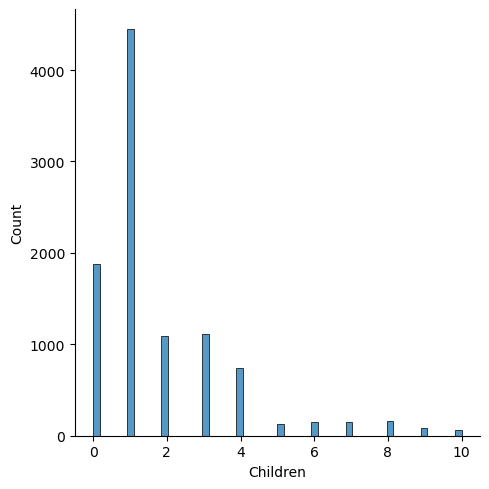

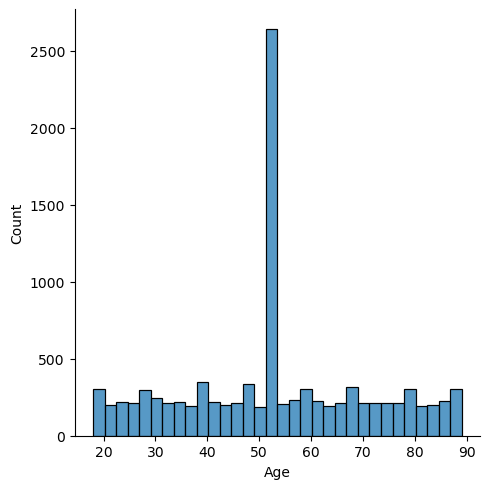

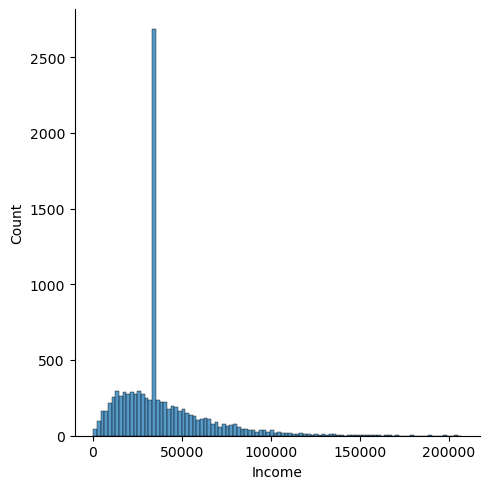

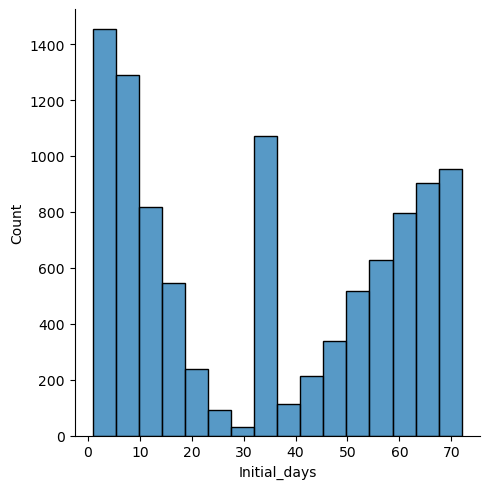

In [153]:
# Plotting histograms again to check for skewness
#Plotting histograms
sns.displot(df, x='Children')
sns.displot(df, x='Age')
sns.displot(df, x='Income')
sns.displot(df, x='Initial_days')

Here we can see that the data behavior is relatively conserved, evident by both statistical information and histogram.
Now we will focus on the remaining categorical variables **Overweight**, **Anxiety**, and **Soft_drink**.


In [154]:
#Detecting amount of missing values in each
print(df['Overweight'].isnull().value_counts())
print('') 
print(df['Soft_drink'].isnull().value_counts())
print('')
print(df['Anxiety'].isnull().value_counts())

False    9018
True      982
Name: Overweight, dtype: int64

False    7533
True     2467
Name: Soft_drink, dtype: int64

False    9016
True      984
Name: Anxiety, dtype: int64


Let's begin with the **Overweight** column - the **Overweight** columns is of the "0 or 1" kind. In order to treat missing values, we will calculate the percentage of each category ( 0 and 1) and impute missing values with the highest percentage category.

In [155]:
# Determining value counts for each category in the Overweight column
df['Overweight'].value_counts(normalize=True, sort=True) # We are using the parameter normalize to return the proportions rather than frequencies

1.0    0.709137
0.0    0.290863
Name: Overweight, dtype: float64

We can see a nearly 70/30 split for 1:0 ratio - this means we can impute the missing values using '1'

In [156]:
# Treating missing values in Overweight column with '1' (highest percentage category)
df['Overweight'].fillna(1, inplace=True)

Now we will follow the same procedure for the **Anxiety** column

In [157]:
# Determining value counts for each category in the Overweight column
df['Anxiety'].value_counts(normalize=True, sort=True) # We are using the parameter normalize to return the proportions rather than frequencies

0.0    0.677684
1.0    0.322316
Name: Anxiety, dtype: float64

In [158]:
# Treating missing values in Anxiety column with '0' (highest percentage category)
df['Anxiety'].fillna(0, inplace=True)

We will now focus on the **Soft-Drink** column which is of the 'Yes/No' type - we will first re-express the variable to '0/1' using Ordinal Encoding and then using the methods used above for **Overweight** and **Anxiety** to fill is missing values.

In [159]:
# We will run the .unique() function to determine number of unique values for specified variables
df['Soft_drink'].unique()

array([nan, 'No', 'Yes'], dtype=object)

We see that the unique values are 'No', 'Yes' and _nan_ for missing values. We will use the percentage method mentioned above to fill these in.

In [160]:
# Determining value counts for each category in the Overweight column
df['Soft_drink'].value_counts(normalize=True, sort=True, dropna=True) # not including the NaN values

No     0.741935
Yes    0.258065
Name: Soft_drink, dtype: float64

Here we see a 75/25 split for a 1:0 ratio - we will use 'No' to fill in the missing values

In [161]:
# Treating missing values in Soft_drink column with 'No' (highest percentage category)
df['Soft_drink'].fillna('No', inplace=True)

In [162]:
# Rechecking for any missing values
df['Soft_drink'].unique()

array(['No', 'Yes'], dtype=object)

We will now begin the ordinal encoding process...

In [163]:
# Replicate the variable in preparation for replacing its categorical values with
# numeric ones. This replicated variable will store the re-expressed values once converted

df['Soft_drink_numeric'] = df['Soft_drink']

In [164]:
# Checking duplicated column 'Soft_drink_numeric' vs original "Soft_drink"
df[['Soft_drink_numeric', 'Soft_drink']]

,Soft_drink_numeric,Soft_drink
0,No,No
1,No,No
2,No,No
3,No,No
4,Yes,Yes
...,...,...
9995,No,No
9996,No,No
9997,Yes,Yes
9998,No,No


In [165]:
# Set up a dictionary specifically for converting the categorical values to numeric values.
dict_soft_drink = {'Soft_drink_numeric': {'No': 0, 'Yes': 1}}

In [166]:
# Use the dictionary to replace the variable’s values. The replacefunction will replace the values according to the rules in
# the dictionary dict_edu and store in existing data frame.
df.replace(dict_soft_drink, inplace=True)

We have detected and treated all missing values. We will now see the dataframe overall and run .info() to see if any null-values exist

In [167]:
# Checking info on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            10000 non-null  float64
 16  Age  

As one can see, there are no more variables with missing values.

# Part 4: Detection and Treatment of Outliers
In this section, we will check for any outliers in the quantitative variables and treat them accordingly.
Let's first visualize the boxplots for the variables.

<AxesSubplot:xlabel='Children'>

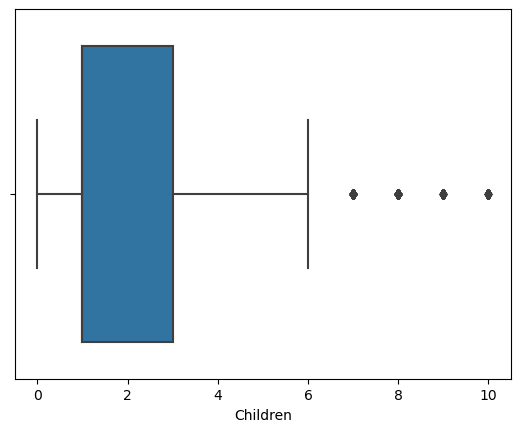

In [168]:
# Children boxplot
sns.boxplot(x='Children', data=df)

<AxesSubplot:xlabel='Age'>

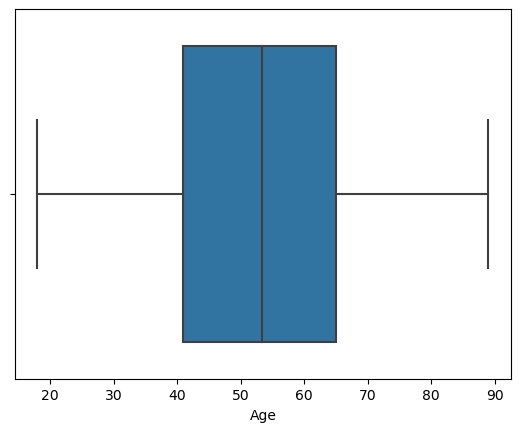

In [169]:
# Age boxplot
sns.boxplot(x='Age', data=df)

<AxesSubplot:xlabel='Income'>

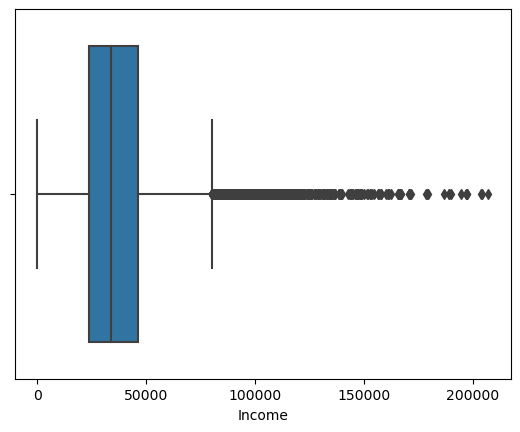

In [170]:
# Income boxplot
sns.boxplot(x='Income', data=df)

<AxesSubplot:xlabel='Initial_days'>

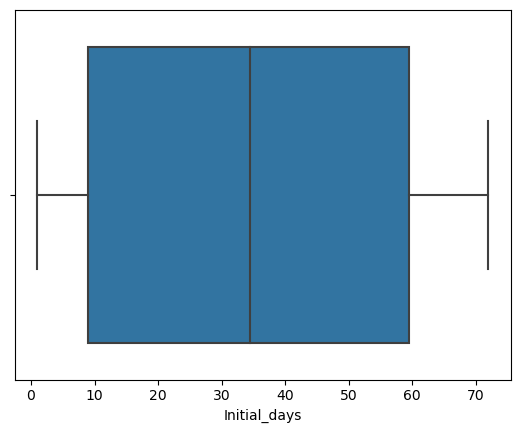

In [171]:
# Initial_days boxplot
sns.boxplot(x='Initial_days', data=df)

Here we can see that **Age** and **Initial_days** have no outliers while **Children** has 4 outliers and **Income** has multiple. Since we do not know if the outliers are factual errors, we will first extract the outliers, save them as their own dataframe and then remove them from the original dataframe.

In [172]:
# Getting basic statistical info on Income and Children columns
df['Income'].describe()
df['Children'].describe()


count     10000.000000
mean      38872.450471
std       25042.796229
min         154.080000
25%       23956.162500
50%       33942.280000
75%       46466.797500
max      207249.130000
Name: Income, dtype: float64

count    10000.000000
mean         1.814000
std          1.916969
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

We will use the z-scores to extract all records whose z-score is greater than 3. We must first import the SciPy package

In [173]:
# Improting Scipy package
import scipy.stats as stats

In [174]:
# Creating a new column for the Income z-scores and Children z-scores
df['Income_z_Scores'] = stats.zscore(df['Income'])
df['Children_z_Scores'] = stats.zscore(df['Children'])

In [175]:
# Viewing first 10 records for both Income and Children z-score columns
df[['Income', 'Income_z_Scores']].head(10)
df[['Children', 'Children_z_Scores']].head(10)

,Income,Income_z_Scores
0,86575.93,1.904974
1,46805.99,0.316815
2,14370.14,-0.978466
3,39741.49,0.034704
4,1209.56,-1.504016
5,33942.28,-0.196880
6,10456.05,-1.134770
7,33942.28,-0.196880
8,55586.48,0.667452
9,38965.22,0.003705


,Children,Children_z_Scores
0,1.0,-0.424650
1,3.0,0.618716
2,3.0,0.618716
3,0.0,-0.946333
4,1.0,-0.424650
5,1.0,-0.424650
6,0.0,-0.946333
7,7.0,2.705447
8,1.0,-0.424650
9,2.0,0.097033


In [176]:
# Extracting records with z-scores -3 < z and z > 3 and saving as new variable 
income_outliers = df.query('Income_z_Scores < -3 | Income_z_Scores > 3')
children_outliers = df.query('Children_z_Scores < -3 | Children_z_Scores > 3')

In [177]:
# Creating a dataframe with Children and Income outliers removed and saving as df_new
df_new = df[(df['Income_z_Scores'] > -3) & (df['Income_z_Scores'] < 3) & (df['Children_z_Scores'] > -3) & (df['Children_z_Scores'] < 3)]

In [178]:
# Checking z-scores in df_new for any z-scores missed in both Income and Children column
df_new['Children_z_Scores'].loc[lambda x : (x < -3) | (x > 3)].sum()
df_new['Income_z_Scores'].loc[lambda x : (x < -3) | (x > 3)].sum()

0.0

0.0

# Part 5: Principal Component Analysis (PCA)


In [181]:
# Importing PCA component of SKLearn
from sklearn.decomposition import PCA

Even though it is not required, we will visualize the variable correlations using a heatmap.

In [199]:
df_new.corr().shape

(29, 29)

<AxesSubplot:>

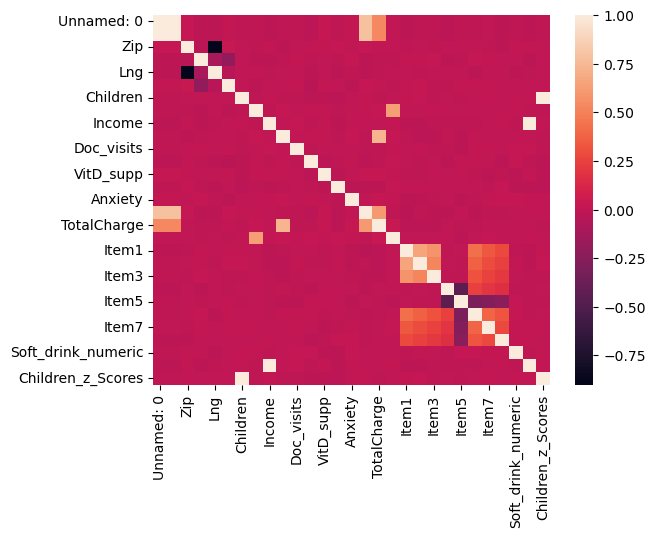

In [197]:
sns.heatmap(df_new.corr())